# Лабораторная работа №3. 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

## Зямзина Анастасия и Лукашева Екатерина


##### Задание:

1. Набор данных для группы <b>3530903_70302</b>: Mercedes<br>
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


## Анализ исходных данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
auto_data = pd.read_csv("merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [3]:
auto_data.info()
auto_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


,year,price,mileage,tax,mpg,engineSize
count,13119.000,13119.000,13119.000,13119.000,13119.000,13119.000
mean,2017.296,24698.597,21949.559,129.972,55.156,2.072
std,2.225,11842.676,21176.512,65.260,15.220,0.572
min,1970.000,650.000,1.000,0.000,1.100,0.000
25%,2016.000,17450.000,6097.500,125.000,45.600,1.800
50%,2018.000,22480.000,15189.000,145.000,56.500,2.000
75%,2019.000,28980.000,31779.500,145.000,64.200,2.100
max,2020.000,159999.000,259000.000,580.000,217.300,6.200


<AxesSubplot:xlabel='year', ylabel='price'>

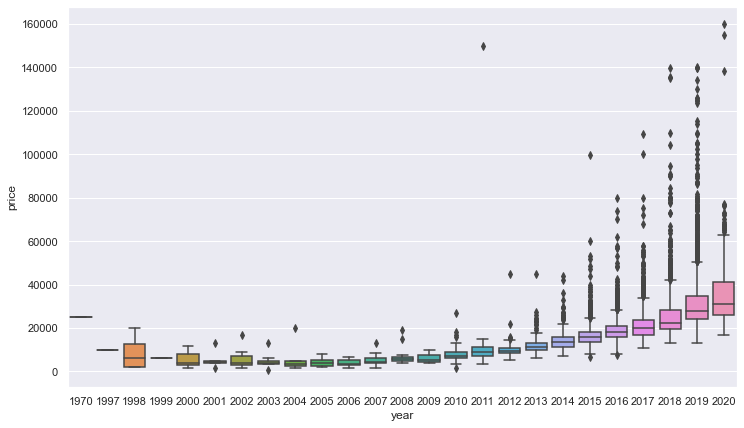

In [4]:
plt.subplots(figsize=(12,7))
sns.boxplot(x=auto_data['year'], y=auto_data['price'])

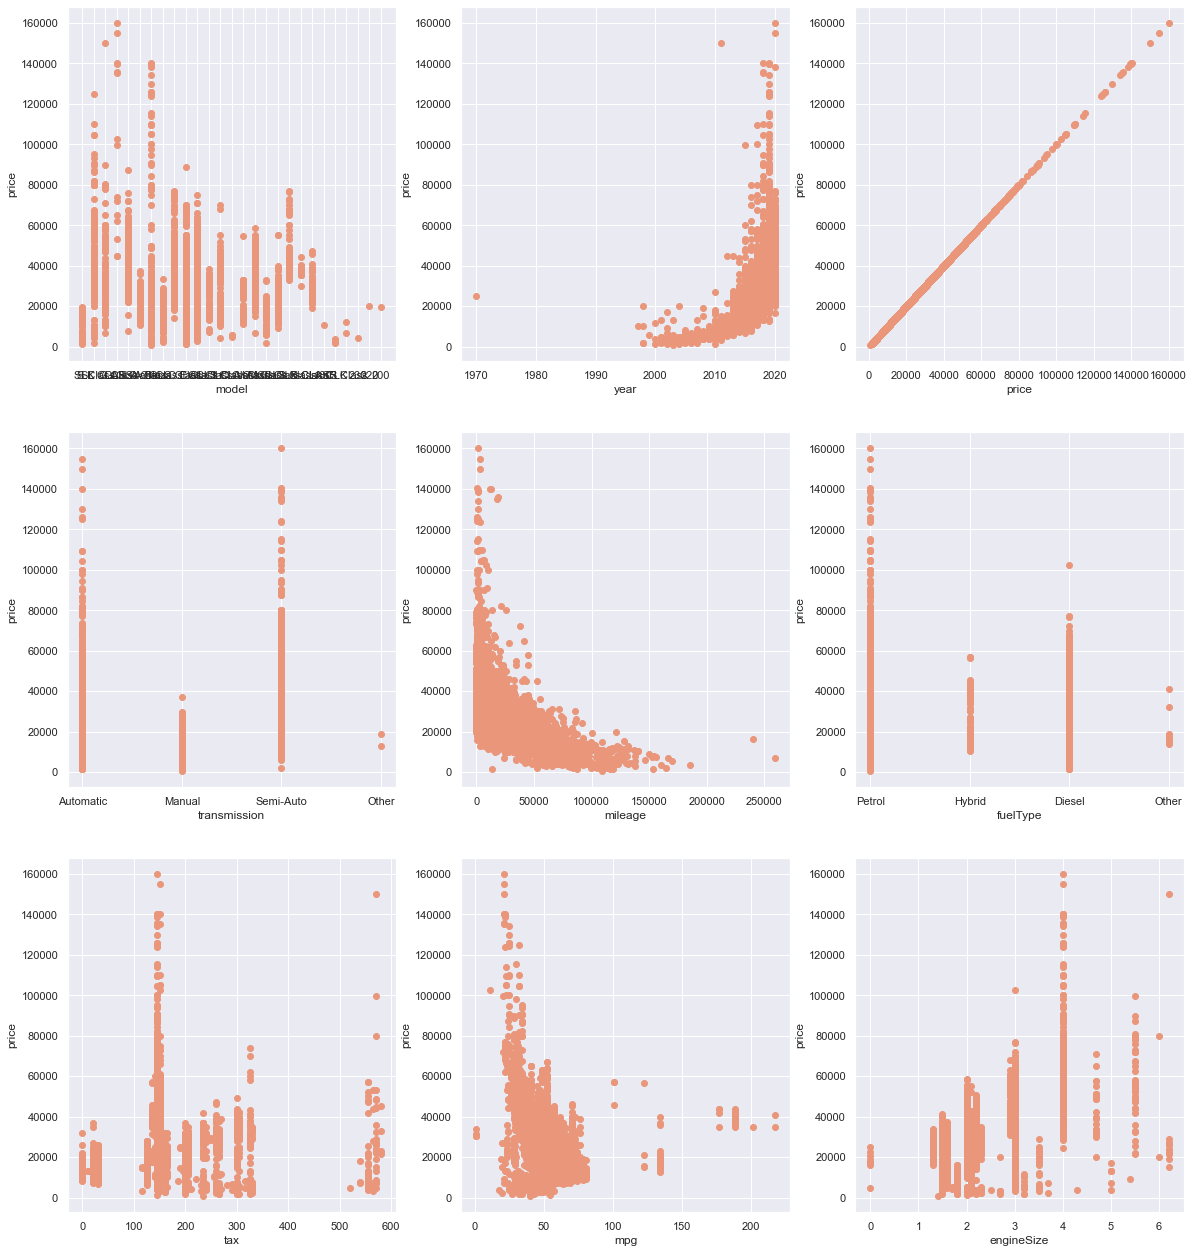

In [5]:
plt.figure(figsize=(20,30))
for i, column in enumerate(auto_data.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(auto_data[column], auto_data['price'], color='#E9967A')
    plt.xlabel(column)
    plt.ylabel('price')
    
plt.show()

<AxesSubplot:>

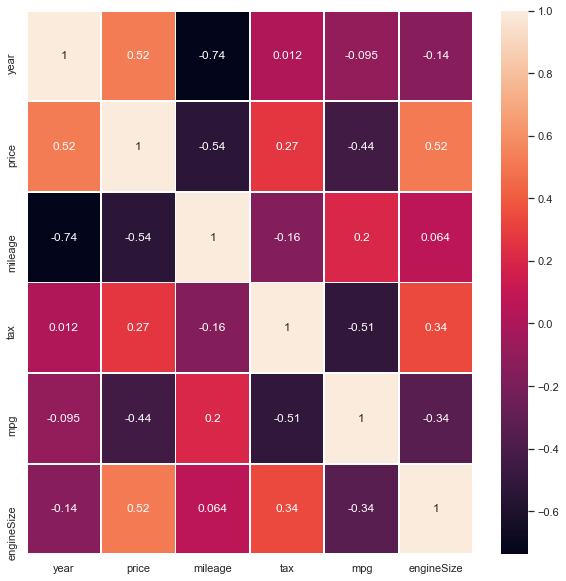

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='pearson'), annot = True, linewidths=0.7, ax=ax )

Из полученной атрицы видно, что зависимости между признаками не линейно зависимые

# Линейная регрессия

In [7]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [8]:
X, Y = auto_data.drop(['price', 'model','transmission','fuelType'], axis=1), auto_data['price']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [10]:
X_train

,year,mileage,tax,mpg,engineSize
5967,2018,6361,145,56.5,2.1
3913,2018,8400,145,57.7,2.0
1638,2016,35991,30,64.2,2.1
4714,2019,5501,145,36.7,2.0
5217,2020,859,145,32.1,2.0
...,...,...,...,...,...
11633,2019,21118,150,37.2,2.0
1344,2016,22433,20,74.3,1.5
12815,2019,11190,150,56.5,2.1
7293,2019,5738,145,53.3,1.3


In [11]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[ 0.313, -0.736,  0.231,  0.083,  0.055],
       [ 0.313, -0.64 ,  0.231,  0.162, -0.119],
       [-0.572,  0.662, -1.52 ,  0.592,  0.055],
       ...,
       [ 0.755, -0.508,  0.307,  0.083,  0.055],
       [ 0.755, -0.766,  0.231, -0.129, -1.334],
       [ 0.313,  0.052,  0.231,  0.797,  0.055]])

In [12]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')

RMSE = 6875.358


In [13]:
print (f'Test std: {round(Y_test.std(),3)}')

Test std: 12330.882


Text(0, 0.5, 'Target')

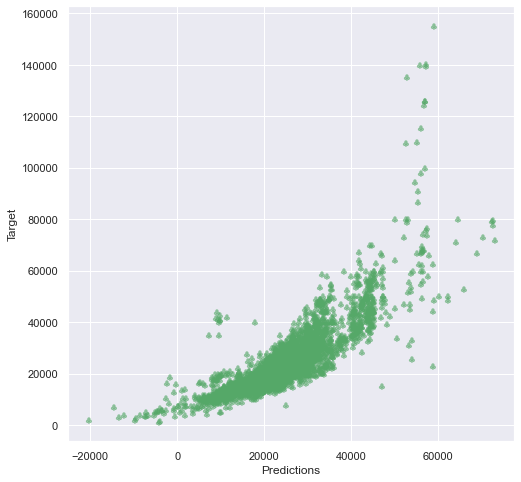

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test, color='g',  alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel('Predictions')
plt.ylabel('Target')

In [15]:
simple_LR.intercept_, simple_LR.coef_

(24630.70456277899,
 array([ 4517.241, -3073.426,  -699.847, -2344.369,  6247.961]))

Посмотрим коэффициенты

In [16]:
pd.DataFrame(simple_LR.coef_, X_train.columns, columns=['Coefficients'])

,Coefficients
year,4517.241
mileage,-3073.426
tax,-699.847
mpg,-2344.369
engineSize,6247.961


#### Ну пока ничего утешительного, у года коэффициент - 4517.241, попробуем убрать выбросы в данном столбце

<AxesSubplot:>

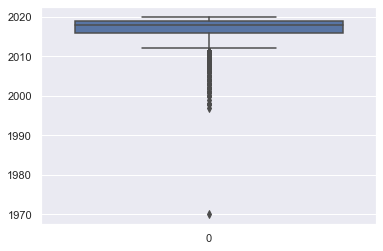

In [17]:
auto_data = pd.read_csv("merc.csv")
sns.boxplot(data=auto_data['year'])

<AxesSubplot:>

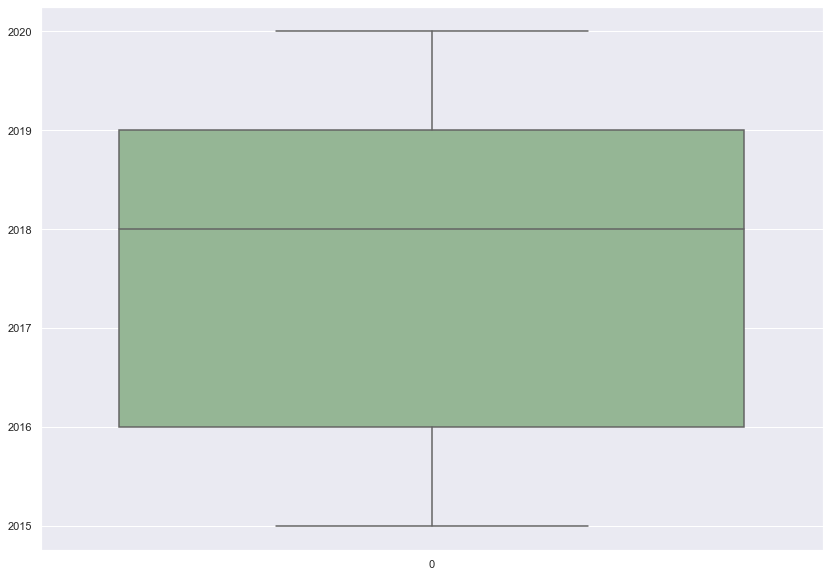

In [18]:
fig, axs = plt.subplots(figsize=(14,10))
auto_data['year'] = auto_data.year.clip(lower=auto_data.year.quantile(0.15))
sns.boxplot(data=auto_data['year'],color='#8FBC8F')

In [19]:
X, Y = auto_data.drop(['price', 'model','transmission','fuelType'], axis=1), auto_data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

model = Lasso()

model.fit(X_train_scaled, Y_train)
L = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_lassoCV, squared=False), 3)}')
print (f'Test std: {round(Y_test.std(),3)}')

pd.DataFrame(model.coef_, X_train.columns,  columns=['Coefficients'])

NameError: name 'predictions_lassoCV' is not defined

In [ ]:
plt.figure(figsize=(8, 8))
#plt.axes(xlim=(-10000, 80000), ylim=(14090, 48000))
plt.scatter(predictions_lassoCV, Y_test, color='#add8e6',  alpha=0.5, marker='D')
plt.xlabel('Predictions')
plt.ylabel('Target')

"""
    Построим линию тренда
"""
z = np.polyfit(predictions_lassoCV, Y_test, 1)
p = np.poly1d(z)
plt.plot(predictions_lassoCV,p(predictions_lassoCV),"r--")

### Рассмотрим price

In [ ]:
auto_data = pd.read_csv("merc.csv")
sns.boxplot(data=auto_data['price'])

<AxesSubplot:>

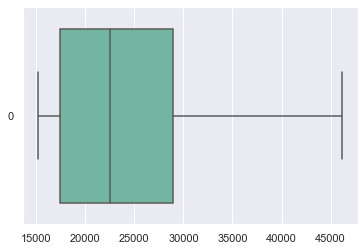

In [20]:
auto_data['price'] = auto_data.price.clip(lower=auto_data.price.quantile(0.15), upper=auto_data.price.quantile(0.95))
sns.boxplot(data=auto_data['price'],color='#8FBC8F', orient="h", palette="Set2")

In [21]:
X, Y = auto_data.drop(['price', 'model','transmission','fuelType'], axis=1), auto_data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_,  X_train.columns, columns=['Coefficients'])

RMSE = 4572.389


,Coefficients
year,4593.920
mileage,-1513.810
tax,-662.795
mpg,-1533.112
engineSize,4396.343


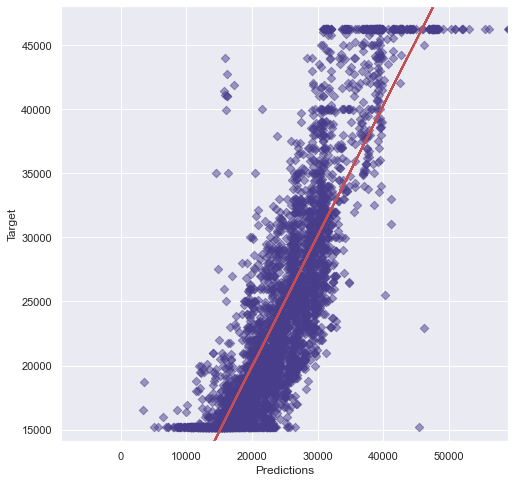

In [22]:
plt.figure(figsize=(8, 8))
plt.axes(xlim=(-9000, 59000), ylim=(14090, 48000))
plt.scatter(predictions, Y_test, color='#483D8B',  alpha=0.5, marker='D')
plt.xlabel('Predictions')
plt.ylabel('Target')

"""
    Построим линию тренда
"""
z = np.polyfit(predictions, Y_test, 1)
p = np.poly1d(z)
plt.plot(predictions,p(predictions),"r--")

## Dummy encoding

In [23]:
auto_data = pd.read_csv("merc.csv")

Добавим в данные информацию о моделях машин

In [24]:
auto_data_dummy = pd.concat([auto_data.drop('model', axis=1), 
                             pd.get_dummies(auto_data['model'])], axis = 1)
auto_data_dummy = auto_data_dummy.drop(['transmission','fuelType'], axis=1)
auto_data_dummy.head()

,year,price,mileage,tax,mpg,engineSize,A Class,B Class,C Class,CL Class,...,R Class,S Class,SL CLASS,SLK,V Class,X-CLASS,180,200,220,230
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Попробуем применить к данным Lasso CV с коэффициентами

In [25]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 10)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

alphas = np.linspace(1, 10, 30)

model = LassoCV(alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions_lassoCV = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_lassoCV, squared=False), 3)}')
print (f'Test std: {round(Y_test.std(),3)}')

pd.DataFrame(model.coef_, X_train.columns, 
             columns=['Coefficients']).sort_values('Coefficients')

RMSE = 6243.857
Test std: 12330.882


,Coefficients
mileage,-3149.151
mpg,-2007.695
tax,-961.921
B Class,-587.841
GLA Class,-572.939
A Class,-263.893
X-CLASS,-203.597
CL Class,-177.710
CLS Class,-76.168
CLA Class,-24.404


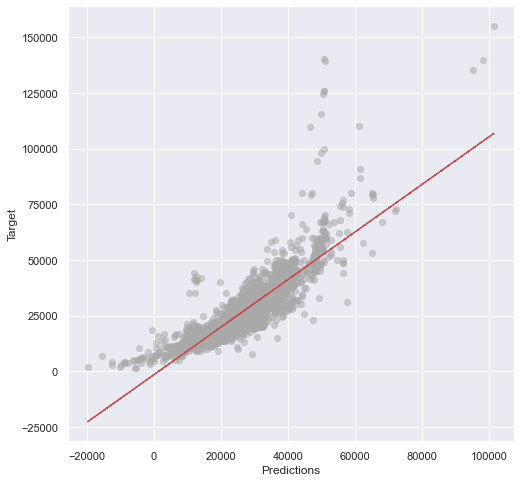

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions_lassoCV, Y_test, color='#A9A9A9',  alpha=0.5, marker='o')
plt.xlabel('Predictions')
plt.ylabel('Target')

"""
    Построим линию тренда
"""
z = np.polyfit(predictions_lassoCV, Y_test, 1)
p = np.poly1d(z)
plt.plot(predictions_lassoCV,p(predictions_lassoCV),"r--")


## Попробуем добавить еще данных и использовать алгоритм Ridge 

In [27]:
auto_data = pd.read_csv("merc.csv")
auto_data_dummy = pd.concat([auto_data.drop('model', axis=1), 
                             pd.get_dummies(auto_data['model'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('fuelType', axis=1), 
                             pd.get_dummies(auto_data_dummy['fuelType'])], axis = 1)
auto_data_dummy =pd.concat([auto_data_dummy.drop('transmission', axis=1), 
                             pd.get_dummies(auto_data_dummy['transmission'])], axis = 1)
auto_data_dummy

,year,price,mileage,tax,mpg,engineSize,A Class,B Class,C Class,CL Class,...,220,230,Diesel,Hybrid,Other,Petrol,Automatic,Manual,Other,Semi-Auto
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
13115,2020,24699,2500,145,55.4,2.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
13116,2019,30999,11612,145,41.5,2.1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13117,2019,37990,2426,145,45.6,2.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [28]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 10)

model_ridge = Ridge()

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

model_ridge.fit(X_train_scaled, Y_train)
predictions_ridge = model_ridge.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_ridge, squared=False), 3)}')

#pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])

RMSE = 6007.52


In [29]:
alphas = np.linspace(1, 20, 100)
model_ridgeCV = RidgeCV(alphas=alphas)

model_ridgeCV.fit(X_train_scaled, Y_train)
predictions_ridgeCV = model_ridgeCV.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_ridgeCV, squared=False), 3)}')

#pd.DataFrame(model.coef_, columns=['Coefficients'])

RMSE = 6010.191


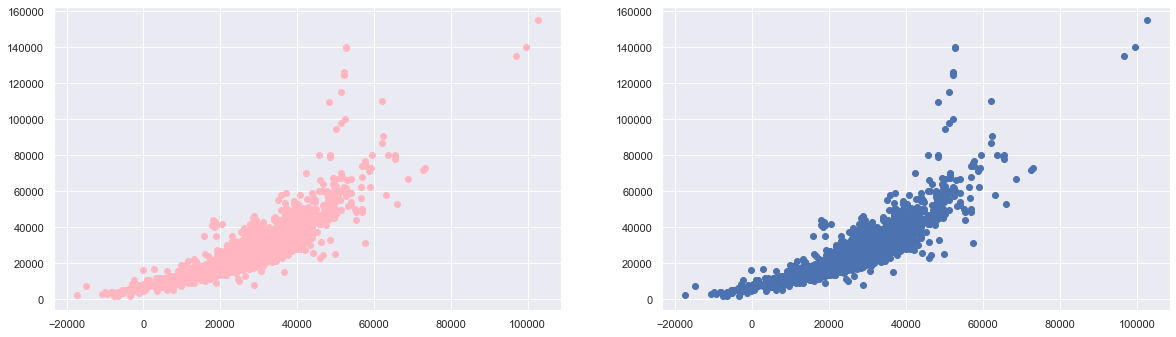

In [30]:
# plot with various axes scales
plt.figure(figsize=(20,19))

plt.subplot(321)
plt.scatter(model_ridge.predict(X_test_scaled), Y_test, color='#ffb6c1')


plt.subplot(322)
plt.scatter(model_ridgeCV.predict(X_test_scaled), Y_test)

RMSE (ridge) = 5109.605
RMSE (ridge_CV) = 5109.605


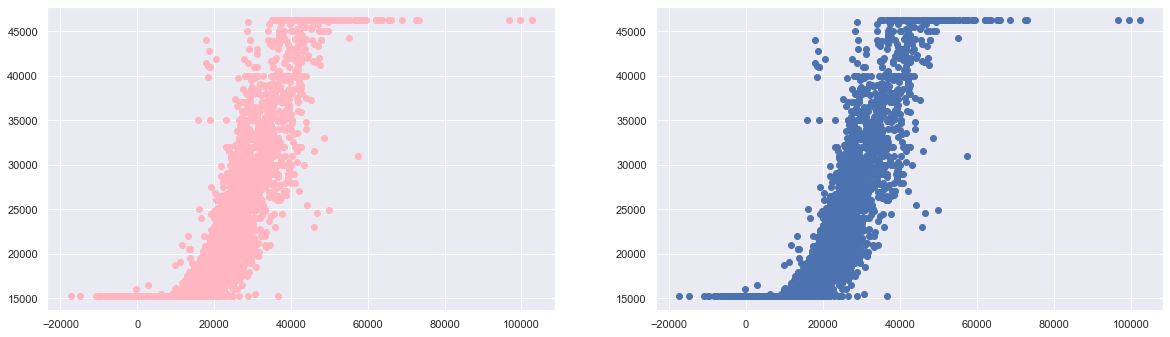

In [31]:
auto_data_dummy['price'] = auto_data_dummy.price.clip(lower=auto_data_dummy.price.quantile(0.15), upper=auto_data_dummy.price.quantile(0.95))

X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 10)
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
print (f'RMSE (ridge) = {round(metrics.mean_squared_error(Y_test,model_ridge.predict(X_test_scaled), squared=False), 3)}')
print (f'RMSE (ridge_CV) = {round(metrics.mean_squared_error(Y_test,model_ridge.predict(X_test_scaled), squared=False), 3)}')



plt.figure(figsize=(20,19))

plt.subplot(321)
plt.scatter(model_ridge.predict(X_test_scaled), Y_test, color='#ffb6c1')


plt.subplot(322)
plt.scatter(model_ridgeCV.predict(X_test_scaled), Y_test)

In [32]:
model = LassoCV(alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

#pd.DataFrame(model.coef_, columns=['Coefficients'])

RMSE = 4202.473


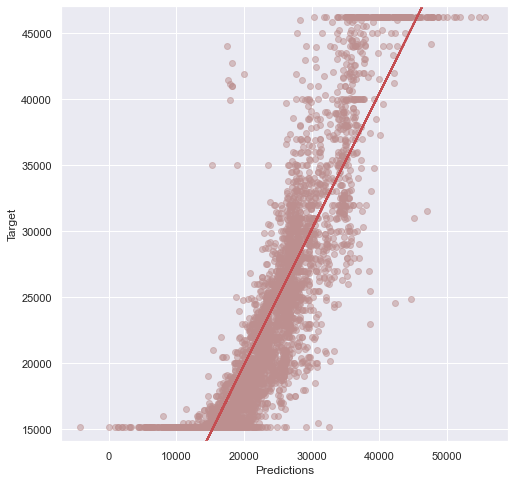

In [33]:
plt.figure(figsize=(8, 8))
plt.axes(xlim=(-7000, 59000), ylim=(14090, 47000))
plt.scatter(predictions, Y_test, color='#BC8F8F',  alpha=0.5, marker='o')
plt.xlabel('Predictions')
plt.ylabel('Target')

"""
    Построим линию тренда
"""
z = np.polyfit(predictions, Y_test, 1)
p = np.poly1d(z)
plt.plot(predictions,p(predictions),"r--")

### Сравним предсказания различных алогритмов

In [34]:
from sklearn.ensemble import RandomForestRegressor

auto_data = pd.read_csv("merc.csv")
auto_data_dummy = pd.concat([auto_data.drop('model', axis=1), 
                             pd.get_dummies(auto_data['model'])], axis = 1)
auto_data_dummy = auto_data_dummy.drop(['fuelType','transmission'], axis=1)

X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 10)
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.feature_importances_, X_train.columns, columns=['Importance']).sort_values('Importance')

RMSE = 2640.356


,Importance
200,0.000e+00
180,0.000e+00
220,0.000e+00
230,4.941e-08
R Class,3.244e-07
CLC Class,1.175e-06
CLK,8.241e-06
GLB Class,1.755e-05
SLK,1.756e-04
CLA Class,2.156e-04


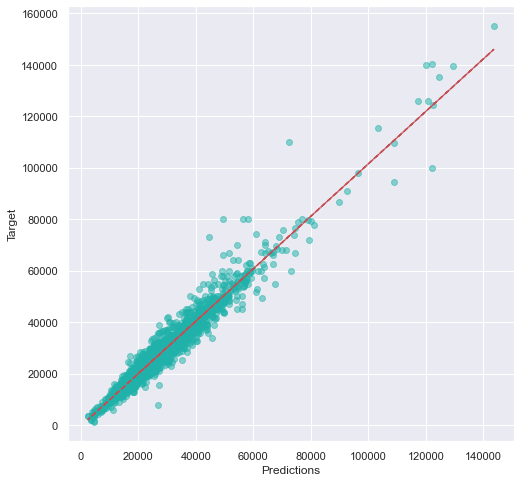

In [35]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test, color='#20b2aa',  alpha=0.5, marker='o')
plt.xlabel('Predictions')
plt.ylabel('Target')

"""
    Построим линию тренда
"""
z = np.polyfit(predictions, Y_test, 1)
p = np.poly1d(z)
plt.plot(predictions,p(predictions),"r--")

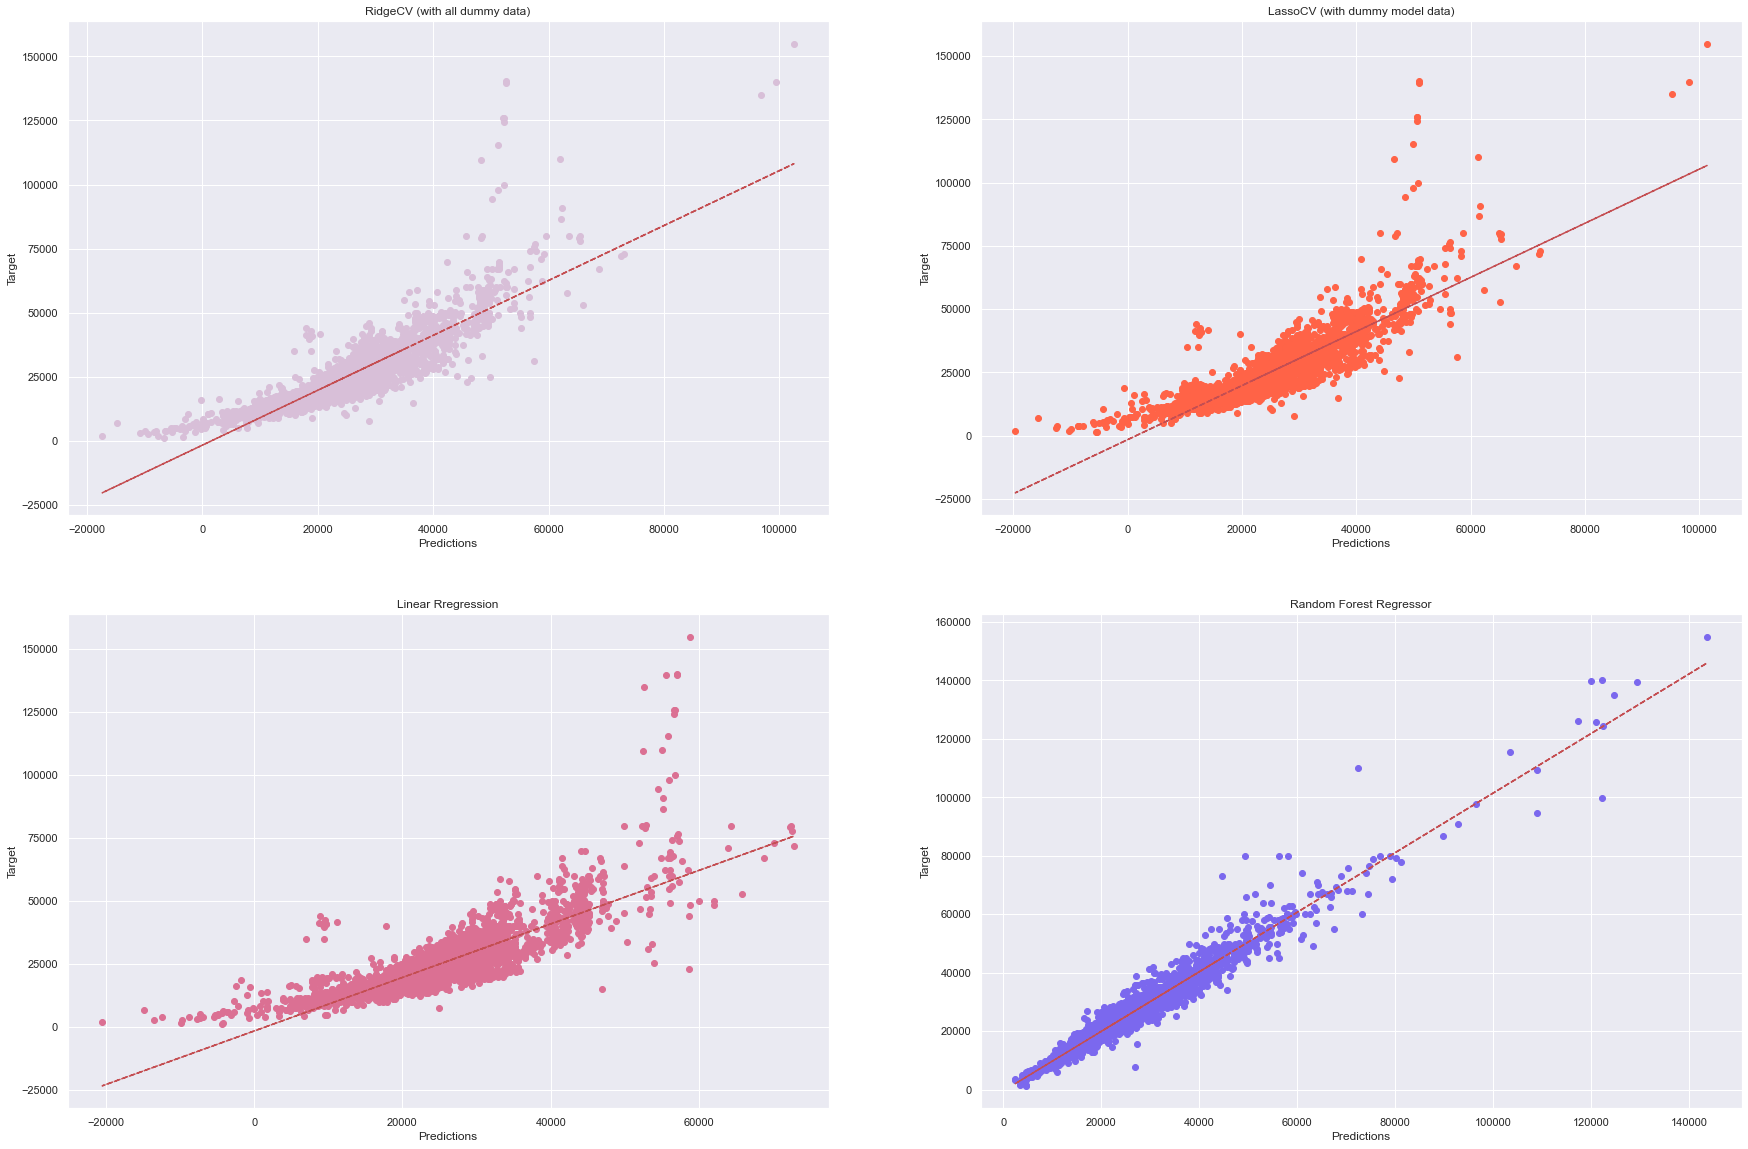

In [45]:
fig = plt.figure(figsize=(30, 20))

ax = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax.scatter(predictions_ridgeCV, Y_test ,color='#D8BFD8')
ax.set(title='RidgeCV (with all dummy data)',ylabel="Target", xlabel="Predictions")
z = np.polyfit(predictions_ridgeCV, Y_test, 1)
p = np.poly1d(z)
ax.plot(predictions_ridgeCV,p(predictions_ridgeCV),"r--")


ax2.scatter(predictions_lassoCV, Y_test,color='#FF6347')
ax2.set(title='LassoCV (with dummy model data)',ylabel="Target", xlabel="Predictions")
z = np.polyfit(predictions_lassoCV, Y_test, 1)
p = np.poly1d(z)
ax2.plot(predictions_lassoCV,p(predictions_lassoCV),"r--")

ax3.scatter(simple_LR_predictions,Y_test, color='#DB7093')
ax3.set(title='Linear Rregression',ylabel="Target", xlabel="Predictions")
z = np.polyfit(simple_LR_predictions, Y_test, 1)
p = np.poly1d(z)
ax3.plot(simple_LR_predictions,p(simple_LR_predictions),"r--")

ax4.scatter(predictions, Y_test,color='#7B68EE')
ax4.set(title='Random Forest Regressor',ylabel="Target", xlabel="Predictions")
z = np.polyfit(predictions, Y_test, 1)
p = np.poly1d(z)
ax4.plot(predictions,p(predictions),"r--")

plt.show()